### Problem statement:
##### Creating a model that can accurately forecast the sales for smallbasket across several locations and product categories.

### Objectives:
##### 1. Explore the data and engineer new features
##### 2. Predict the number of sales for a given item for the dates given in the ‘test.csv’ file
##### 3. Answer questions from the operations team using the machine learning models that you have developed

### Business Questions to be answered:
##### Business units belonging to which cluster will see the highest amount of sales for the first 15 days of 2019?
##### What are the top 10 selling items in this cluster?
##### What is the rate of purchase per week for these items?

### Importing Libraries

In [0]:
import pandas as pd

from IPython.display import Image

import numpy as np
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

### Reading the necessary files

In [0]:
train_data = pd.read_csv('/content/drive/My Drive/Insofe/PHD/train1.csv', header= 0, low_memory=False, na_values='null')
test_data = pd.read_csv('/content/drive/My Drive/Insofe/PHD/NewTest.csv', header= 0, low_memory=False, na_values='null')

### Checking the data

In [3]:
train_data.shape

(101688779, 5)

In [4]:
test_data.shape

(1482295, 5)

In [5]:
train_data.columns

Index(['date', 'locationId', 'item_id', 'unit_sales', 'onpromotion'], dtype='object')

In [6]:
test_data.columns

Index(['id', 'date', 'locationId', 'item_id', 'onpromotion'], dtype='object')

In [7]:
train_data.dtypes

date            object
locationId      object
item_id         object
unit_sales     float64
onpromotion     object
dtype: object

In [8]:
test_data.dtypes

id              int64
date           object
locationId     object
item_id        object
onpromotion      bool
dtype: object

### Visualisations

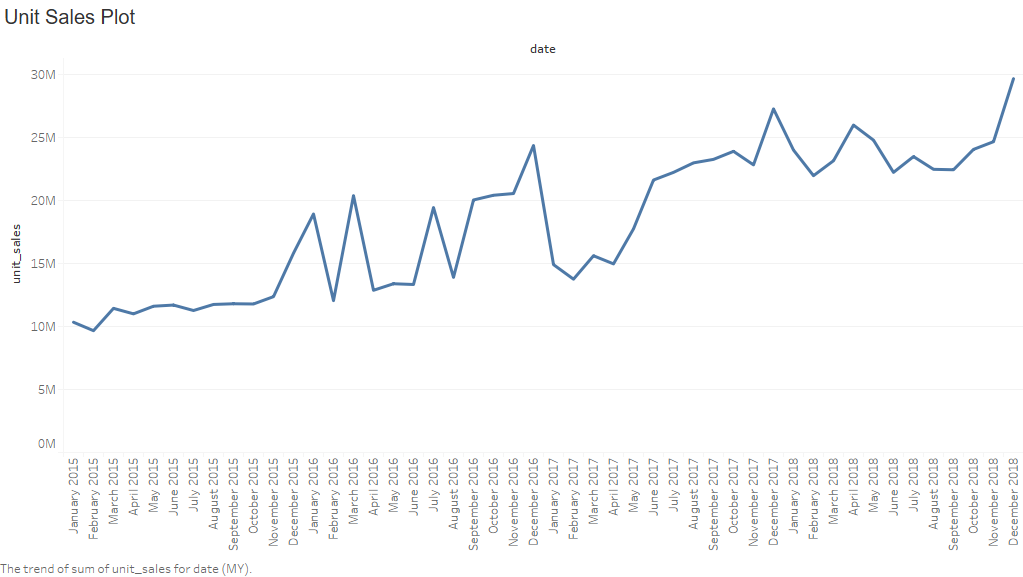

In [9]:
Image(filename='/content/drive/My Drive/Insofe/PHD/Graphs/1. MonthlySales.png')

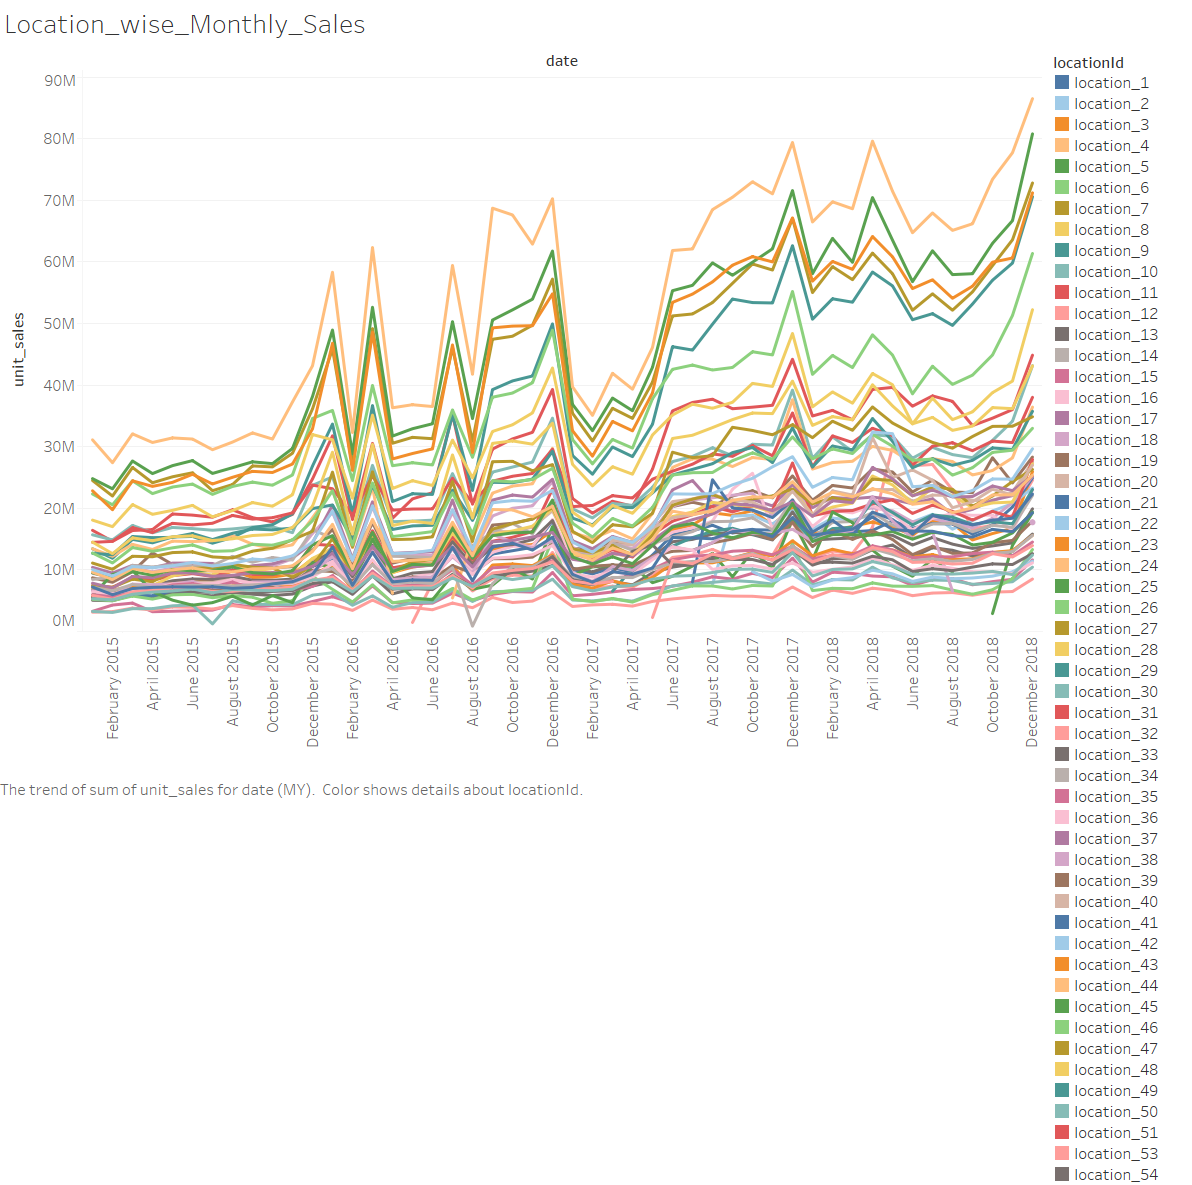

In [10]:
Image(filename='/content/drive/My Drive/Insofe/PHD/Graphs/loc_ms.png')

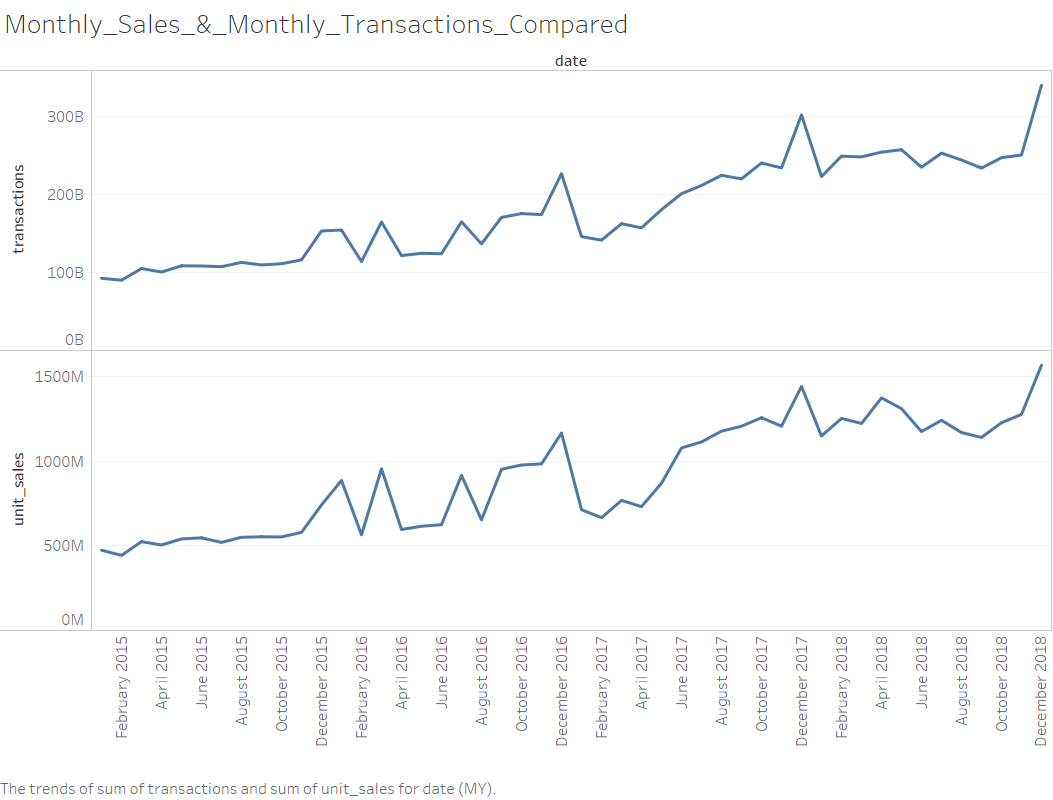

In [11]:
Image(filename='/content/drive/My Drive/Insofe/PHD/Graphs/2. txn_sales3.png')

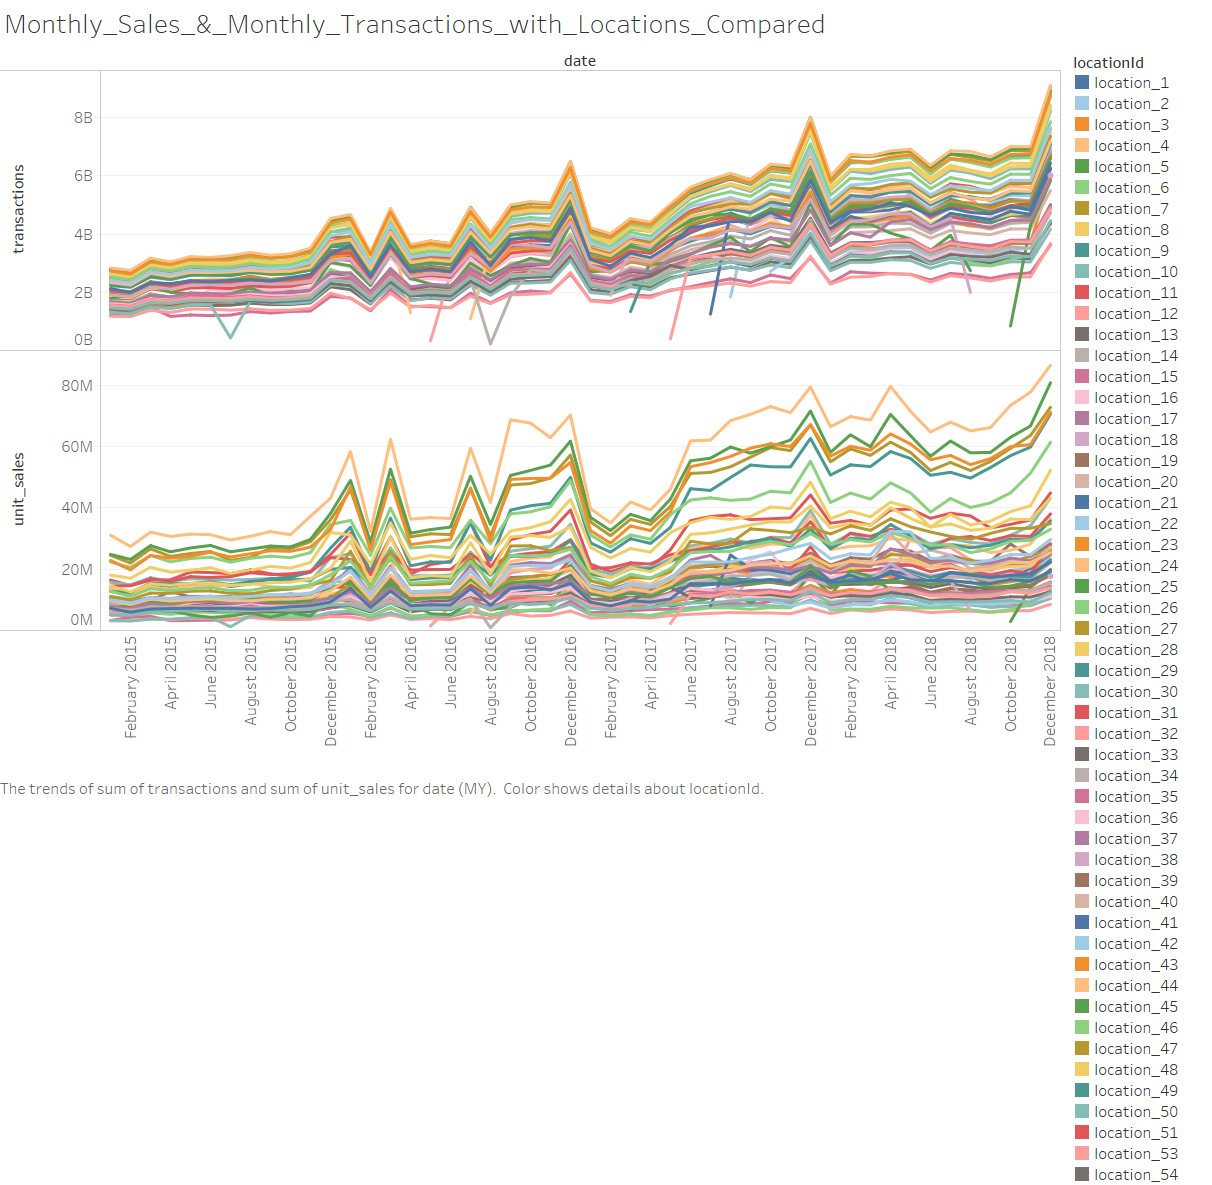

In [12]:
Image(filename='/content/drive/My Drive/Insofe/PHD/Graphs/txn_sales_loc.png')

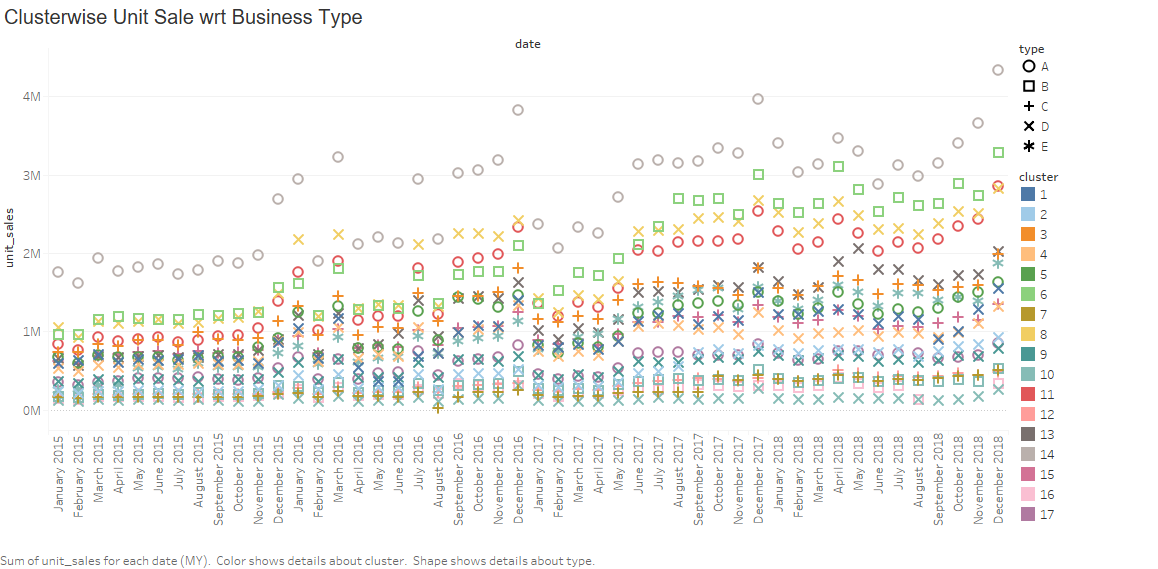

In [13]:
Image(filename='/content/drive/My Drive/Insofe/PHD/Graphs/Clusterwise Unit Sales wrt Business Type.png')

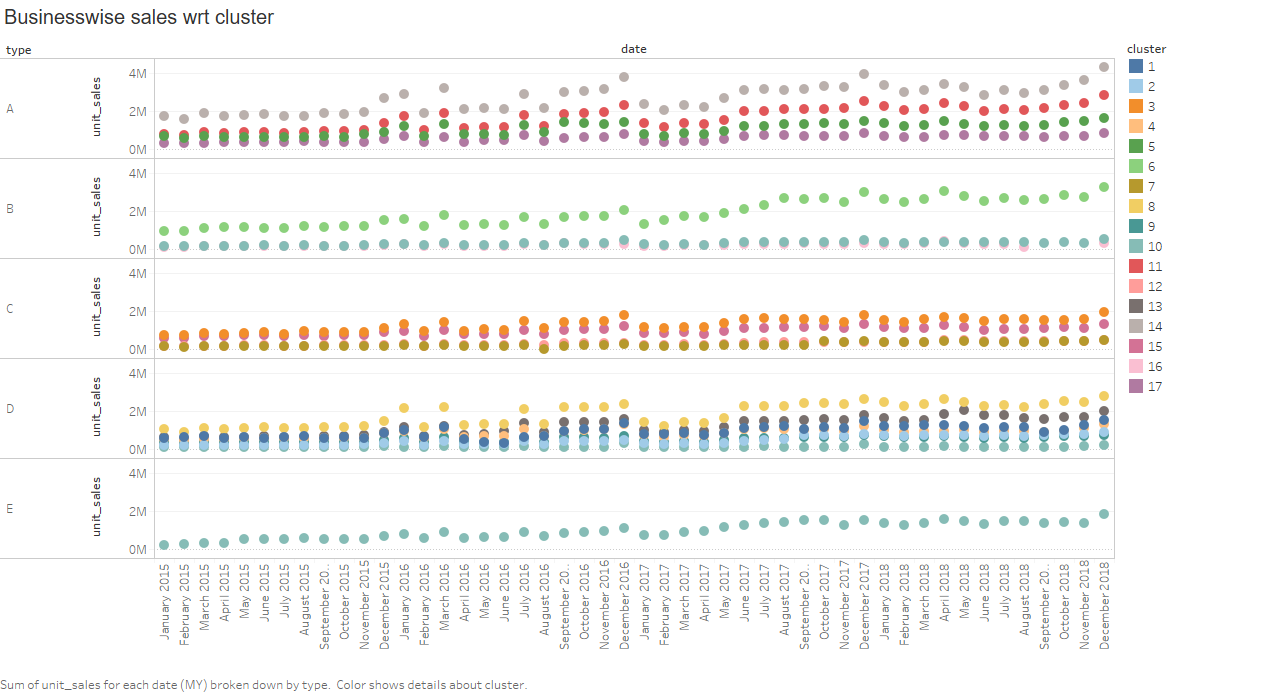

In [14]:
Image(filename='/content/drive/My Drive/Insofe/PHD/Graphs/Bisinesswise sales wrt cluster.png')

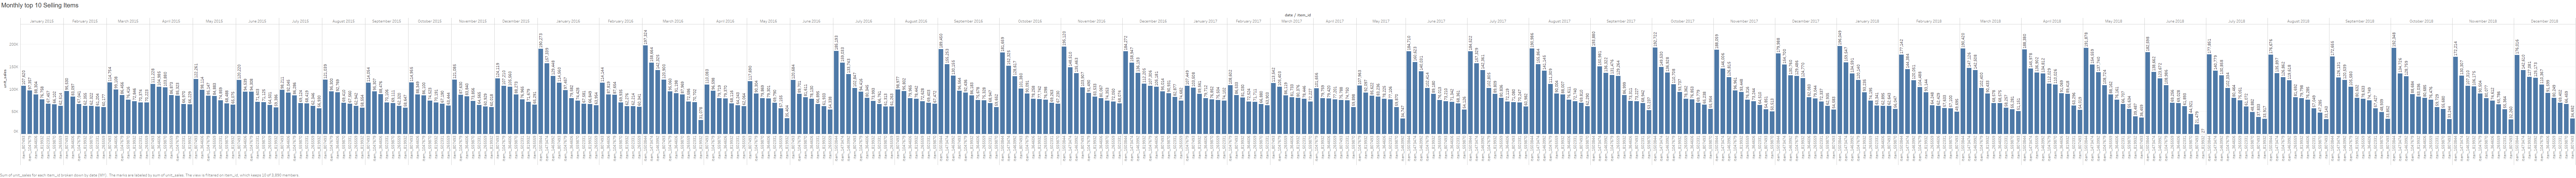

In [15]:
Image(filename='/content/drive/My Drive/Insofe/PHD/Graphs/Monthly top 10 selling items.png')

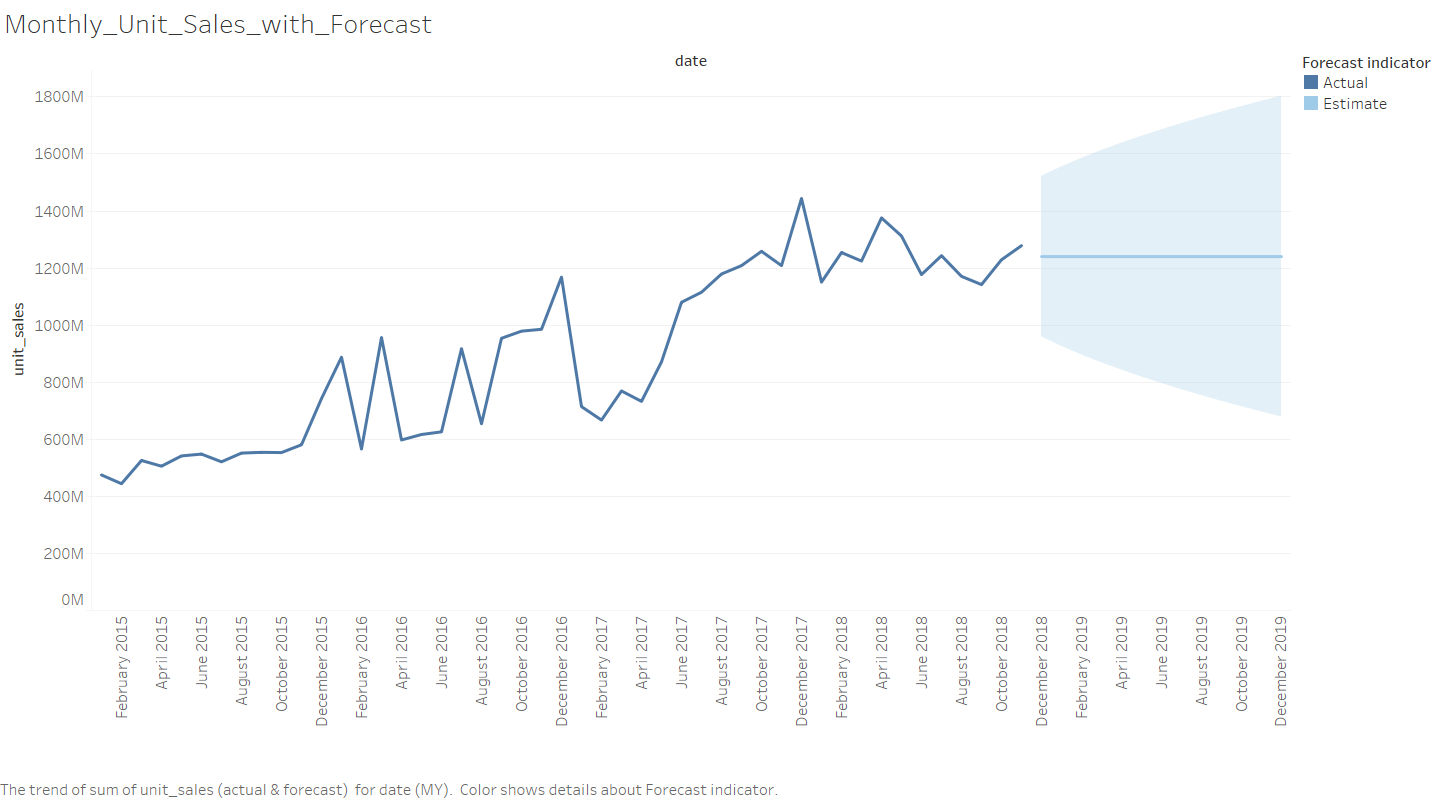

In [16]:
Image(filename='/content/drive/My Drive/Insofe/PHD/Graphs/salesfc.png')

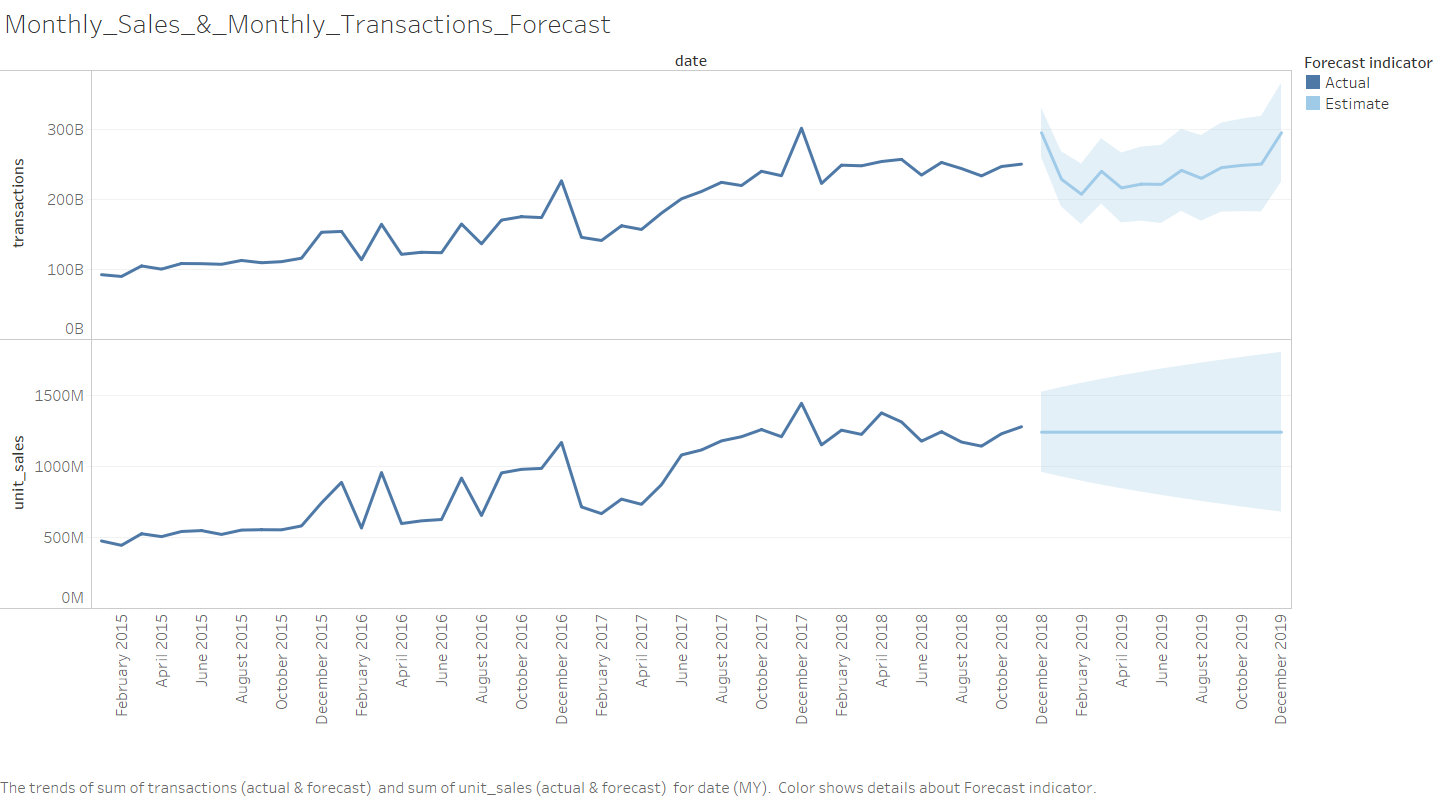

In [17]:
Image(filename='/content/drive/My Drive/Insofe/PHD/Graphs/txn_sales_fc.png')

### Saving id from test_data for further use

In [0]:
test_id = test_data['id']
test_data = test_data.drop('id', axis= 1)

In [19]:
test_data.columns

Index(['date', 'locationId', 'item_id', 'onpromotion'], dtype='object')

### Changing the necessary datatypes

In [0]:
for i in train_data.select_dtypes('object'):
  train_data[i]=train_data[i].astype('category')
for i in test_data.select_dtypes('object'):
  test_data[i]=test_data[i].astype('category')

In [21]:
train_data.dtypes

date           category
locationId     category
item_id        category
unit_sales      float64
onpromotion    category
dtype: object

In [22]:
test_data.dtypes

date           category
locationId     category
item_id        category
onpromotion        bool
dtype: object

### Checking for Null values in the train data

In [24]:
train_data.isnull().sum()

date                  0
locationId            0
item_id               0
unit_sales            0
onpromotion    21657651
dtype: int64

In [25]:
test_data.isnull().sum()

date           0
locationId     0
item_id        0
onpromotion    0
dtype: int64

In [26]:
train_data.onpromotion.value_counts()

False    74970155
True      5060973
Name: onpromotion, dtype: int64

### Imputing onpromotion with most frequent value

In [0]:
train_data['onpromotion'].fillna(value = False, inplace= True)

In [28]:
train_data.isnull().sum()

date           0
locationId     0
item_id        0
unit_sales     0
onpromotion    0
dtype: int64

In [0]:
test_data['onpromotion'] = test_data['onpromotion'].astype('category')

In [30]:
test_data.dtypes

date           category
locationId     category
item_id        category
onpromotion    category
dtype: object

In [31]:
train_data.dtypes

date           category
locationId     category
item_id        category
unit_sales      float64
onpromotion    category
dtype: object

### Converting date column to datetime type

In [0]:
train_data['date']=train_data['date'].astype('datetime64[ns]').dt.normalize()
test_data['date']=test_data['date'].astype('datetime64[ns]').dt.normalize()

In [33]:
train_data.head(10)

,date,locationId,item_id,unit_sales,onpromotion
0,2015-01-01,location_25,item_103665,7.0,False
1,2015-01-01,location_25,item_105574,1.0,False
2,2015-01-01,location_25,item_105575,2.0,False
3,2015-01-01,location_25,item_108079,1.0,False
4,2015-01-01,location_25,item_108701,1.0,False
5,2015-01-01,location_25,item_108786,3.0,False
6,2015-01-01,location_25,item_108797,1.0,False
7,2015-01-01,location_25,item_108952,1.0,False
8,2015-01-01,location_25,item_111397,13.0,False
9,2015-01-01,location_25,item_114790,3.0,False


In [34]:
train_data.dtypes

date           datetime64[ns]
locationId           category
item_id              category
unit_sales            float64
onpromotion          category
dtype: object

In [35]:
test_data.dtypes

date           datetime64[ns]
locationId           category
item_id              category
onpromotion          category
dtype: object

In [36]:
train_data.shape

(101688779, 5)

### Converting datetime to integer type using toordinal

In [0]:
import datetime as dt
train_data['date']=train_data['date'].map(dt.datetime.toordinal)
test_data['date']=test_data['date'].map(dt.datetime.toordinal)

In [38]:
train_data.dtypes

date              int64
locationId     category
item_id        category
unit_sales      float64
onpromotion    category
dtype: object

In [39]:
train_data.head(10)

,date,locationId,item_id,unit_sales,onpromotion
0,735599,location_25,item_103665,7.0,False
1,735599,location_25,item_105574,1.0,False
2,735599,location_25,item_105575,2.0,False
3,735599,location_25,item_108079,1.0,False
4,735599,location_25,item_108701,1.0,False
5,735599,location_25,item_108786,3.0,False
6,735599,location_25,item_108797,1.0,False
7,735599,location_25,item_108952,1.0,False
8,735599,location_25,item_111397,13.0,False
9,735599,location_25,item_114790,3.0,False


### Checking and optimizing the data types for easy compute

In [40]:
train_data.date.min()

735599

In [41]:
train_data.date.max()

737059

In [0]:
train_data['date'] = train_data['date'].astype('int32')
test_data['date'] = test_data['date'].astype('int32')

In [0]:
train_data['unit_sales'] = train_data['unit_sales'].astype('float32')

In [44]:
train_data.dtypes

date              int32
locationId     category
item_id        category
unit_sales      float32
onpromotion    category
dtype: object

### Eliminating columns with negative unit sales

In [0]:
train_data = train_data[train_data.unit_sales> 0]

### Seperating the target veriable

In [0]:
y = train_data['unit_sales']
X = train_data.drop('unit_sales', axis = 1)

In [47]:
X.dtypes

date              int32
locationId     category
item_id        category
onpromotion    category
dtype: object

In [48]:
test_data.dtypes

date              int32
locationId     category
item_id        category
onpromotion    category
dtype: object

### Train Test (Validation) split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Seperating categorical type and numaric type

In [0]:
cat_attr = list(X.select_dtypes("category").columns)
num_attr = list(X.columns.difference(cat_attr))

### Initializing the transformers

In [0]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_attr),
        ('cat', categorical_transformer, cat_attr)])

### Linear Regression

Initializing the pipeling for linear regression

In [0]:
lin_reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LinearRegression())])

Fitting the linear regression

In [53]:
lin_reg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['date']),
                                                 ('cat',
                                                  Pipeline(memory=None,

Predicting on validation data

In [0]:
y_pred_lin = lin_reg.predict(X_test)

Calculating MAPE

In [0]:
mape = np.mean(np.abs((y_test - y_pred_lin) / y_test))*100

MAPE value of the model

In [56]:
print(mape)

148.9189414507536


Predicting on given test data

In [0]:
test_pred_lin = lin_reg.predict(test_data)

Saving the prediction in csv

In [0]:
data = {'id': test_id, 'unit_sales': test_pred_lin}
pd.DataFrame(data).to_csv('/content/drive/My Drive/Insofe/PHD/linear_Reg.csv', index= False)

Plot to visualize the prediction and get clusters which will see highest unit sales in first 15 days of 2019 based on predictions

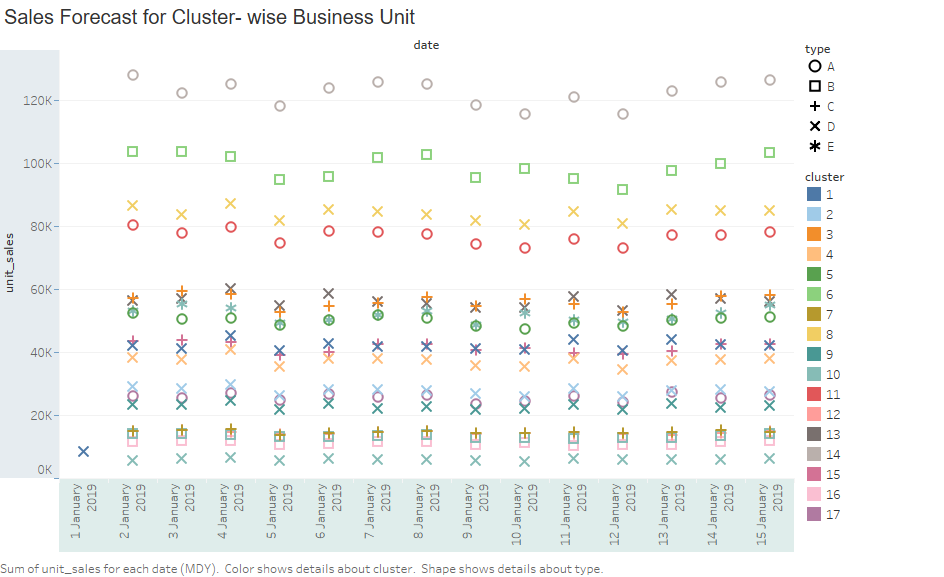

In [59]:
Image(filename='/content/drive/My Drive/Insofe/PHD/Graphs/Results/forecast_type_cluster.png')

Top 10 selling items in the high sales cluster 

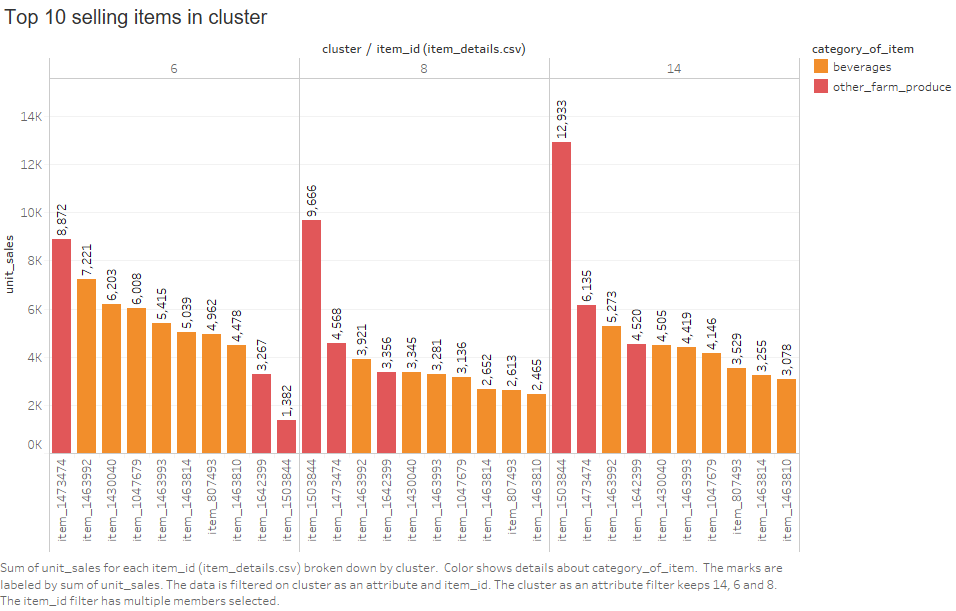

In [60]:
Image(filename='/content/drive/My Drive/Insofe/PHD/Graphs/Results/top10itemsInCluster.png')

Weekly rate of purchase of the top 10 selling items

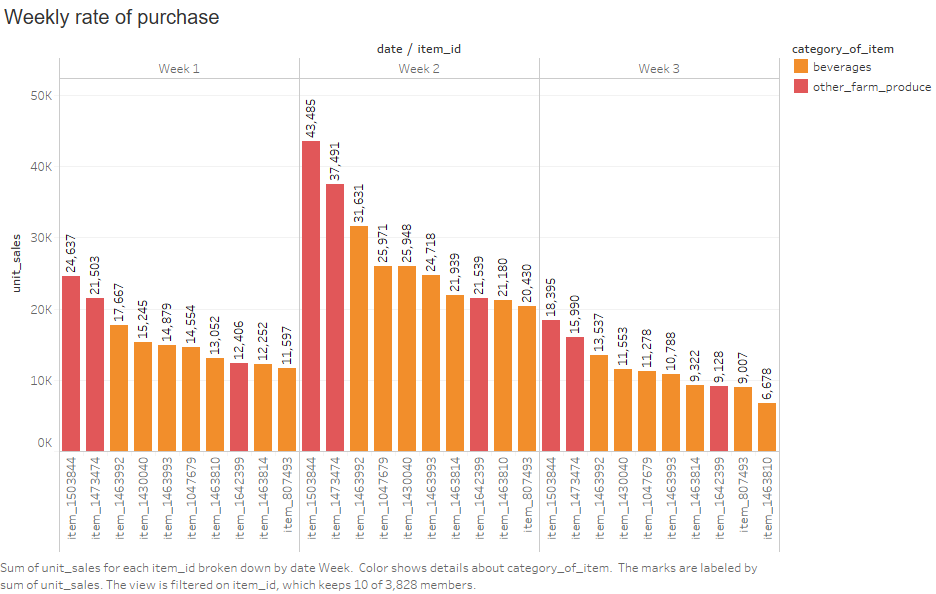

In [61]:
Image(filename='/content/drive/My Drive/Insofe/PHD/Graphs/Results/weekly_rate_of_purchase.png')

### Lasso

Initializing pipeling for Lasso

In [0]:
lasso = Pipeline(steps=[('preprocessor', preprocessor),
                      ('elasticNet', Lasso())])

Fitting the model

In [63]:
lasso.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['date']),
                                                 ('cat',
                                                  Pipeline(memory=None,

Predicting on validation data

In [0]:
y_pred_lasso = lasso.predict(X_test)

Calculaing MAPE of the model

In [0]:
mape = np.mean(np.abs((y_test - y_pred_lasso) / y_test))*100

MAPE of the model

In [66]:
print(mape)

247.52068142950895


Predicting lasso on given test data

In [0]:
test_pred_lasso = lasso.predict(test_data)

Saving the prediction on csv file

In [0]:
data = {'id': test_id, 'unit_sales': test_pred_lasso}
pd.DataFrame(data).to_csv('/content/drive/My Drive/Insofe/PHD/lasso.csv', index= False)

### Random Forest Regressor

Initializing Random Forest Regressor Pipeline

In [0]:
randomForest =  Pipeline(steps=[('preprocessor',preprocessor),('regressor',RandomForestRegressor(criterion= 'mae', max_depth= 10))])

Fitting Random forest

In [0]:
randomForest.fit(X_train,y_train)

Prediction in validation data

In [0]:
y_pred_ran_rig = randomForest.predict(X_test)

Calculating MAPE

In [0]:
mape = np.mean(np.abs((y_test - y_pred_ran_rig) / y_test))*100

MAPE of the model

In [0]:
print(mape)

Predicting on given test data

In [0]:
test_pred_ran_rig = randomForest.predict(test_data)

Saving the results to csv file

In [0]:
data = {'id': test_id, 'unit_sales': test_pred_ran_rig}
pd.DataFrame(data).to_csv('/content/drive/My Drive/Insofe/PHD/random_forest.csv', index= False)